In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick



pd.set_option("display.max_colwidth", None)


In [ ]:
display(reveal_df)

,question,initial_reasoning,final_reasoning,initial_step_count,final_step_count,initial_word_count,final_word_count,initial_invalid_count,final_invalid_count,reached_valid_reasoning,...,word_count_change,initial_readability,final_readability,readability_change,initial_coherence,final_coherence,coherence_change,refinement_attempts,refinement_time_seconds,dataset
0,What mass of neutrinos leave the sun every second?,"Q: What mass of neutrinos leave the sun every second?\nLet's reason step by step. \n\n## Step 1: Understand the context of neutrino emission from the sun\nThe sun emits a tremendous amount of energy in the form of light and heat, but it also emits neutrinos, which are particles produced by nuclear reactions in the sun's core.\n\n## Step 2: Recall the rate of neutrino emission from the sun\nThe sun emits approximately 2.5 x 10^26 neutrinos per second. This rate is based on the sun's energy production and the known nuclear reactions that occur in its core.\n\n## Step 3: Determine the mass of a single neutrino\nThe mass of a neutrino is extremely small, approximately 0.0000005 atomic mass units (amu) or 8.2 x 10^-43 kilograms.\n\n## Step 4: Calculate the total mass of neutrinos emitted per second\nTo find the total mass of","Q: What mass of neutrinos leave the sun every second?\n- Step 6 is invalid: ""6. The sun emits approximately 3.8 x 10^26 watts of power, which is equivalent to about 3.8 x 10^26 joules per second.""\nFor each invalid step, rewrite it to ensure it follows from the previous steps. Identify incorrect assumptions and provide a revised version. Break down each step logically, verify assumptions, and ensure consistency in your thought process. If any gaps, ambiguities, or contradictions exist, correct them by providing clearer justifications. \nA: Step 1: The sun emits a tremendous amount of energy every second, which is primarily due to nuclear reactions occurring in its core. The sun's energy output is approximately 3.8 x 10^26 watts. Step 2: The sun's core is incredibly hot, with temperatures reaching over 15 million degrees Celsius. This heat is converted into energy through nuclear reactions",4,1,146,145,0,0,True,...,-1,8.8,9.7,0.9,0.465402,1.000000,0.534598,2,56.006903,REVEAL
1,"Is the following sentence plausible? ""Norman Powell committed a blocking foul.""","Q: Is the following sentence plausible? ""Norman Powell committed a blocking foul.""\nLet's reason step by step. \n\nStep 1: Understand the definition of a blocking foul. A blocking foul is a foul that occurs when a defensive player makes contact with an opponent who does not have possession of the ball. In other words, the player who has the ball is not involved in the contact.\n\nStep 2: Consider the position of Norman Powell. He is a wide receiver. Therefore, he is not likely to be involved in a blocking foul.\n\nStep 3: Since a blocking foul requires contact between a defensive player and an opponent who does not have possession of the ball, it is highly unlikely that Norman Powell would be involved in such a foul.\n\nStep 4: Based on the definition of a blocking foul and the position of Norman Powell, it is highly unlikely that he would be guilty of committing a blocking foul.\n\nStep 5: Since the","Q: Is the following sentence plausible? ""Norman Powell committed a blocking foul.""\n- Step 1 is invalid: ""Step 1: Understand the context. The question is asking about the plausibility of a sentence, which suggests that we need to consider the context in which the sentence is being used. In this case, the context is likely a sports game, given the mention of ""Norman Powell"" and ""blocking foul.""""\nFor each invalid step, rewrite it to ensure it follows from the previous steps. Identify incorrect assumptions and provide a revised version. Break down each step logically, verify assumptions, and ensure consistency in your thought process. If any gaps, ambiguities, or contradictions exist, correct them by providing clearer justifications. \n

In [ ]:
reveal_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS266/Final_Project/Working Code/Copies/reveal_dataset_results_new_updated_312.csv')
gsm8k_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS266/Final_Project/Working Code/Copies/gsm8k_data_evaluated.csv')

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
from tqdm import tqdm

model_name = "gpt2"
tokenizer = GPT2TokenizerFast.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)
model.eval()
if torch.cuda.is_available():
    model.to("cuda")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
# Perplexity computation function
def compute_perplexity(text):
    try:
        encodings = tokenizer(text, return_tensors="pt")
        input_ids = encodings.input_ids.to(model.device)

        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
            loss = outputs.loss
            perplexity = torch.exp(loss).item()
        return perplexity
    except Exception as e:
        print(f"Error computing perplexity: {e}")
        return None


In [ ]:
# reveal_df["initial_perplexity"] = reveal_df["initial_reasoning"].apply(compute_perplexity)
# gsm8k_df["initial_perplexity"] = gsm8k_df["initial_reasoning"].apply(compute_perplexity)


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


In [ ]:
# reveal_df["initial_perplexity"] = reveal_df["initial_reasoning"].apply(compute_perplexity)
# gsm8k_df["initial_perplexity"] = gsm8k_df["initial_reasoning"].apply(compute_perplexity)


In [ ]:
valid_subset = reveal_df[reveal_df["reached_valid_reasoning"] == True]
valid_perplexity_change = (valid_subset["initial_perplexity"] - valid_subset["final_perplexity"]).mean()
print("Avg perplexity improvement for valid reasoning:", valid_perplexity_change)

valid_subset = reveal_df[reveal_df["reached_valid_reasoning"] == False]
valid_perplexity_change = (valid_subset["initial_perplexity"] - valid_subset["final_perplexity"]).mean()
print("Avg perplexity improvement for non valid reasoning:", valid_perplexity_change)



In [ ]:
readability_change = reveal_df['readability_change'].sum()
print(readability_change)


117.29999999999998


In [ ]:
coherence_change = reveal_df['coherence_change'].sum()
print(coherence_change)




9.038069003954302


In [ ]:
summary_stats = {
    "Total Readability Improvement": reveal_df["readability_change"].sum(),
    "Total Coherence Improvement": reveal_df["coherence_change"].sum(),
    "Average Readability Improvement": reveal_df["readability_change"].mean(),
    "Average Coherence Improvement": reveal_df["coherence_change"].mean(),
    "Total Refinement Attempts": reveal_df["refinement_attempts"].sum(),
    "Average Refinement Attempts": reveal_df["refinement_attempts"].mean(),
    "Total Refinement Time (seconds)": reveal_df["refinement_time_seconds"].sum(),
    "Average Refinement Time (seconds)": reveal_df["refinement_time_seconds"].mean(),
    "Valid Reasoning Achieved": reveal_df["reached_valid_reasoning"].sum(),
    "Total Samples Processed": len(reveal_df),
    "Percentage Valid Reasoning Achieved": (reveal_df["reached_valid_reasoning"].sum() / len(reveal_df)) * 100


}

reveal_df["perplexity_change"] = (reveal_df["initial_perplexity"] - reveal_df["final_perplexity"])
summary_stats["Average Perplexity Improvement"] = reveal_df["perplexity_change"].mean()
summary_stats["Total Perplexity Improvement"] = reveal_df["perplexity_change"].sum()
reveal_df_summary = pd.DataFrame(summary_stats, index=["Metrics"]).T


In [ ]:
display(reveal_df_summary)

,Metrics
Total Readability Improvement,117.300000
Total Coherence Improvement,9.038069
Average Readability Improvement,1.221875
Average Coherence Improvement,0.094147
Total Refinement Attempts,158.000000
Average Refinement Attempts,1.645833
Total Refinement Time (seconds),4614.926089
Average Refinement Time (seconds),48.072147
Valid Reasoning Achieved,86.000000
Total Samples Processed,96.000000


In [ ]:
summary_stats = {
    "Total Readability Improvement": gsm8k_df["readability_change"].sum(),
    "Total Coherence Improvement": gsm8k_df["coherence_change"].sum(),
    "Average Readability Improvement": gsm8k_df["readability_change"].mean(),
    "Average Coherence Improvement": gsm8k_df["coherence_change"].mean(),
    "Total Refinement Attempts": gsm8k_df["refinement_attempts"].sum(),
    "Average Refinement Attempts": gsm8k_df["refinement_attempts"].mean(),
    "Total Refinement Time (seconds)": gsm8k_df["refinement_time_seconds"].sum(),
    "Average Refinement Time (seconds)": gsm8k_df["refinement_time_seconds"].mean(),
    "Valid Reasoning Achieved": gsm8k_df["reached_valid_reasoning"].sum(),
    "Total Samples Processed": len(gsm8k_df),
    "Percentage Valid Reasoning Achieved": (gsm8k_df["reached_valid_reasoning"].sum() / len(gsm8k_df)) * 100
}

gsm8k_df["perplexity_change"] = (gsm8k_df["initial_perplexity"] - gsm8k_df["final_perplexity"])
summary_stats["Average Perplexity Improvement"] = gsm8k_df["perplexity_change"].mean()
summary_stats["Total Perplexity Improvement"] = gsm8k_df["perplexity_change"].sum()
gsm8k_df_summary = pd.DataFrame(summary_stats, index=["Metrics"]).T



In [ ]:
gsm8k_df_summary

,Metrics
Total Readability Improvement,98.100000
Total Coherence Improvement,3.027621
Average Readability Improvement,1.066304
Average Coherence Improvement,0.032909
Total Refinement Attempts,126.000000
Average Refinement Attempts,1.369565
Total Refinement Time (seconds),3334.228086
Average Refinement Time (seconds),36.241610
Valid Reasoning Achieved,86.000000
Total Samples Processed,92.000000


In [ ]:
gsm8k_df['dataset'] = 'GSM8K'
reveal_df['dataset'] = 'REVEAL'

combined_df = pd.concat([gsm8k_df, reveal_df])
combined_df['valid_reasoning'] = combined_df['reached_valid_reasoning'].astype(int)


In [ ]:
print(combined_df.columns)

Index(['question', 'initial_reasoning', 'final_reasoning',
       'initial_step_count', 'final_step_count', 'initial_word_count',
       'final_word_count', 'initial_invalid_count', 'final_invalid_count',
       'reached_valid_reasoning', 'step_count_change', 'word_count_change',
       'initial_readability', 'final_readability', 'readability_change',
       'initial_coherence', 'final_coherence', 'coherence_change',
       'refinement_attempts', 'refinement_time_seconds', 'dataset',
       'valid_reasoning'],
      dtype='object')


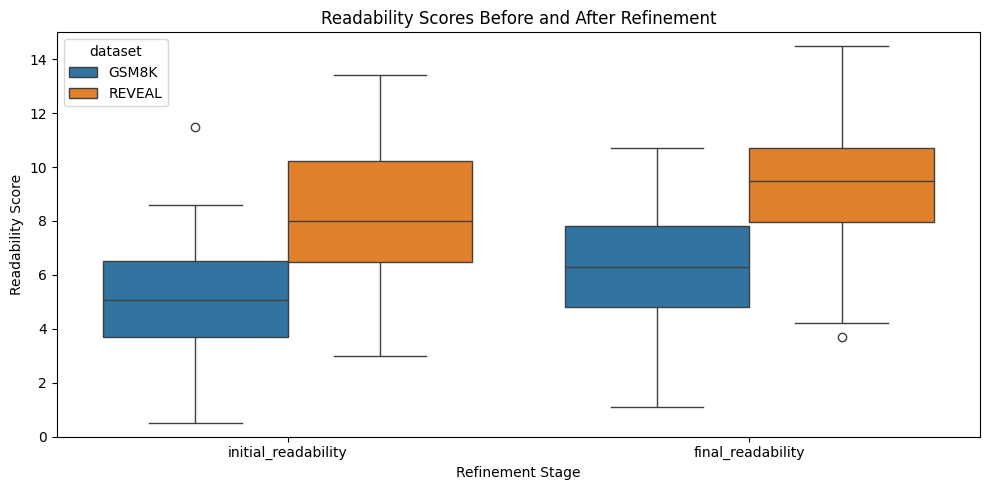

In [ ]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=combined_df.melt(id_vars='dataset', value_vars=['initial_readability', 'final_readability']),
            x='variable', y='value', hue='dataset')
plt.title('Readability Scores Before and After Refinement')
plt.xlabel('Refinement Stage')
plt.ylabel('Readability Score')
plt.ylim(0, 15)
plt.tight_layout()
plt.show()



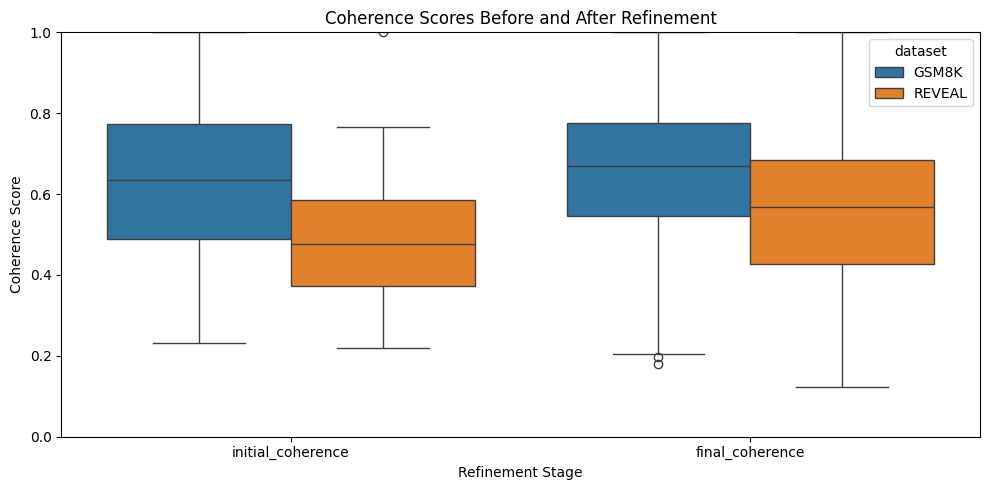

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=combined_df.melt(id_vars='dataset', value_vars=['initial_coherence', 'final_coherence']),
            x='variable', y='value', hue='dataset')
plt.title('Coherence Scores Before and After Refinement')
plt.xlabel('Refinement Stage')
plt.ylabel('Coherence Score')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()



<ipython-input-17-4407c111c1d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=valid_reasoning_by_dataset, x='dataset', y='valid_reasoning', palette='pastel')


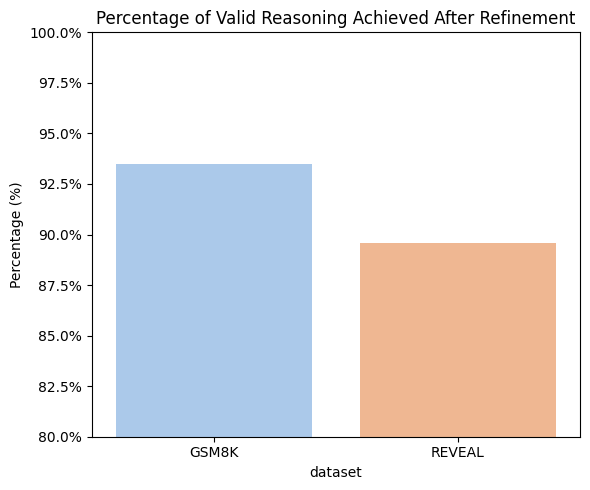

In [ ]:
valid_reasoning_by_dataset = combined_df.groupby('dataset')['valid_reasoning'].mean().reset_index()
valid_reasoning_by_dataset['valid_reasoning'] *= 100

plt.figure(figsize=(6, 5))
sns.barplot(data=valid_reasoning_by_dataset, x='dataset', y='valid_reasoning', palette='pastel')
plt.title('Percentage of Valid Reasoning Achieved After Refinement')
plt.ylabel('Percentage (%)')
plt.ylim(80, 100)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()



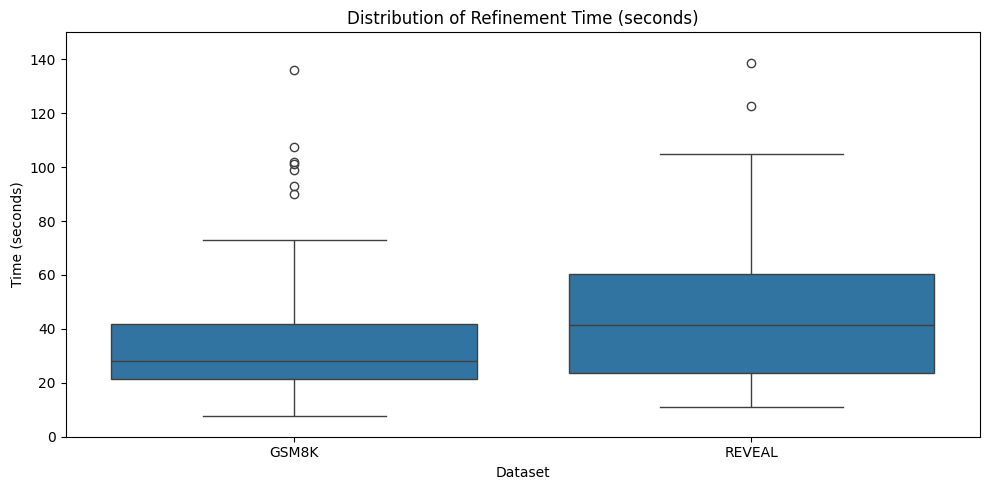

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=combined_df, x='dataset', y='refinement_time_seconds')
plt.title('Distribution of Refinement Time (seconds)')
plt.ylabel('Time (seconds)')
plt.xlabel('Dataset')
plt.ylim(0, 150)
plt.tight_layout()
plt.show()



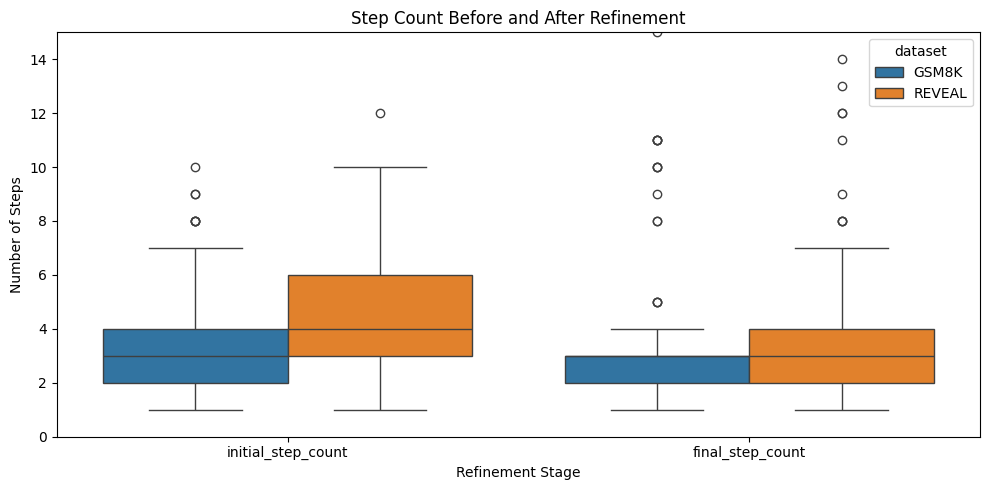

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=combined_df.melt(id_vars='dataset', value_vars=['initial_step_count', 'final_step_count']),
            x='variable', y='value', hue='dataset')
plt.title('Step Count Before and After Refinement')
plt.xlabel('Refinement Stage')
plt.ylabel('Number of Steps')
plt.ylim(0, 15)
plt.tight_layout()
plt.show()

<ipython-input-43-2d5163e665f9>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=bar_df, x='Stage', y='Perplexity', hue='dataset', ci='sd')


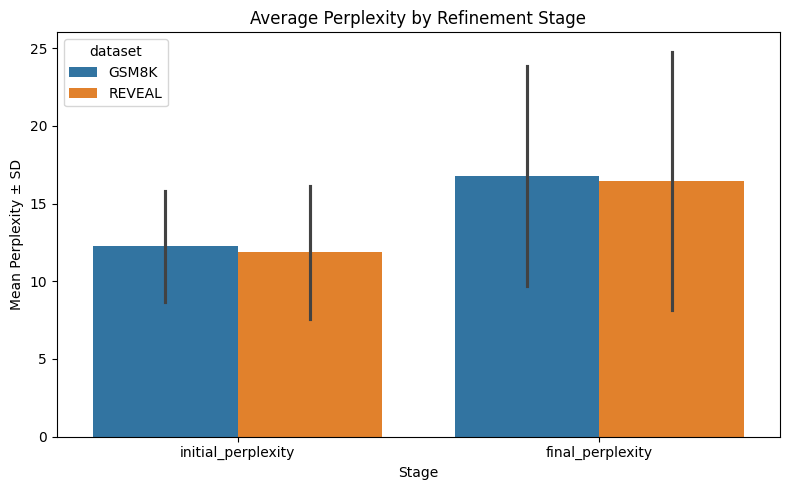

In [ ]:
bar_df = combined_df.melt(id_vars='dataset', value_vars=['initial_perplexity', 'final_perplexity'],
                          var_name='Stage', value_name='Perplexity')

plt.figure(figsize=(8, 5))
sns.barplot(data=bar_df, x='Stage', y='Perplexity', hue='dataset', ci='sd')
plt.title("Average Perplexity by Refinement Stage")
plt.ylabel("Mean Perplexity ± SD")
plt.tight_layout()
plt.show()
